## Goal of tutorial: compare standard stats and non-parametric approaches and develop an intuition about why, in many cases, non-parametric stats are preferred
* In parametric NHT stats, we make a lot of assumptions about our data and how it is sampled and distributed (e.g. normal distribution, independent samples) and that we can then use standardized distributions (e.g. t-distribution) to make inferences about the population.

* Using non-parametric randomization and bootstrapping approaches, we can back away from many of these assuptions. 

* We can collect our data and then directly evaluate our confidence in the summary statistics (and also differences between conditions) without resorting to comparing to standardized distributions.

* Sometimes, i.e. when you have lots of data and all assumptions are met, these approaches will converge on the answers you get from parametric stats.

* However, there are cases where the methods will diverge, and there are often good reasons to favor these non-parametric approaches over standard statistical test.

## Randomization tests
In a typical study, you collect data from two or more groups (or conditions) and then
you want to decide if the two group means are different given the separation 
of their means and their variances. So you compute the differences
between the means, weight that difference by the variance, and then
compare that test statistic against a standard look up table (e.g. a
t-distribution or similar) to get a p-value.  

This standard approach makes a number of assumptions:
* The data are normally distributed so that the test stat follows the expected distribution (i.e. a t-distribution)
* That we have taken random and independent samples from the population(s) 
* We use a standard look-up-table to put a p-value on our test statistic so that we can genearlize our results to the entire population

In contrast, *RANDOMIZATION TESTING* relaxes many of these assumptions in place of a different approach.
* We do not need normally distributed data, etc. We often fail to meet this condition in real data anyway, so this is a pretty handy thing. We also relax the independent and random sampling assumptions - we are just going to deal with the data that we have in hand and take it as it comes. 
* With randomization testing, we are not able to make a population inference (see bootstrapping section below for notes about that). 
* Instead, we are evaluating how likely our summary statistic is given the null hypothesis that our experimental manipulations have no effect (or phrased a different and more useful way - the null hypthesis that our experimental condition labels have no effect on the outcome of the summary statistic). 

<div class="alert alert-info">
The test statistic that we generate is not compared to a standard look up table - instead we generate our own 'null' distribution against which to compare the data that we collect to evalute the propbability of obtaining a test statistic of the observed magnitude given that our condition labels (or our manipulation) had no effect.
</div>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

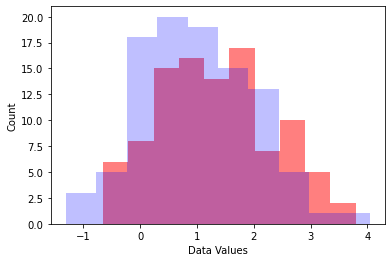

2.306399312657527
0.02317289757101887


In [40]:
# np.random.seed(0)

N = 100

cond_mu = 1.3,1
cond_std = 1,1

d1 = (np.random.randn(N) * cond_std[0]) + cond_mu[0]
d2 = (np.random.randn(N) * cond_std[1]) + cond_mu[1]

# histograms 
plt.hist(d1, color='r', alpha=.5)
plt.hist(d2, color='b', alpha=.25)
plt.xlabel('Data Values')
plt.ylabel('Count')
plt.show()

t_stats = stats.ttest_1samp(d1-d2, 0)

parametric_t = t_stats.statistic
parametric_p = t_stats.pvalue

print(parametric_t)
print(parametric_p)

# # repeated, related sample
# t_stats = stats.ttest_rel(d1,d2)


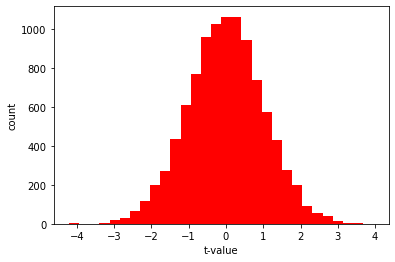

0.04610000000000003


In [9]:
# randomization...
np.random.seed(0)
num_rands = 10000

# this will store the emipircal distribution of t-values
null_t = np.zeros(num_rands)

for i in np.arange(num_rands):
    
    rand_data = np.sign(np.random.rand(N) - .5) * (d1-d2)
    
    null_t[i] = stats.ttest_1samp(rand_data, 0)[0]
    
plt.hist(null_t, color='r', bins = 30)
plt.xlabel('t-value')
plt.ylabel('count')
plt.show()

# actually compute a p-value
rand_p = (1-(np.sum(parametric_t > np.abs(null_t)) / num_rands))

print(rand_p)

0.8164205163448396
0.002169628873078809


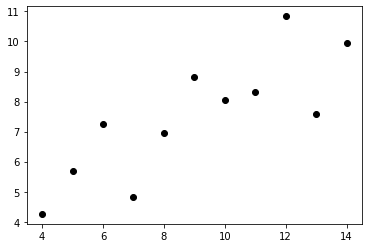

In [10]:
d1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
d2 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

N = len(d1)

para_r, para_p = stats.pearsonr(d1, d2)

print(para_r)
print(para_p)

plt.scatter(d1,d2,color='k')
plt.show()


In [12]:
np.random.seed(0)

num_rands = 5000

null_r = np.zeros(num_rands)

tmp0 = np.zeros(N)
tmp1 = np.zeros(N)

for i in np.arange(num_rands):
    
    for j in np.arange(N):
        if np.random.rand() < .5:
            tmp0[j] = d1[j]
            tmp1[j] = d2[j]
        else:
            tmp0[j] = d2[j]
            tmp1[j] = d1[j]
            
    null_r[i] = stats.pearsonr(tmp0, tmp1)[0]
    

null_p = 2 * (np.sum(null_r > para_r) / num_rands)

print(null_p)
            


0.03


## Bootstrapping...resampling with replacement to estimate population CIs

In [16]:
np.random.seed(0)

N = 1000000

pop_mean = 100
pop_std = 10


pop_data = (np.random.randn(N) * pop_std) + pop_mean


S_N = 1000000

index = np.random.permutation(N)[0:S_N]

samp_data = pop_data[index]


print(np.mean(pop_data))
print(np.std(pop_data))
print(np.mean(samp_data))
print(np.std(samp_data))

100.01512146515539
9.999213260166576
100.01512146515536
9.999213260166574


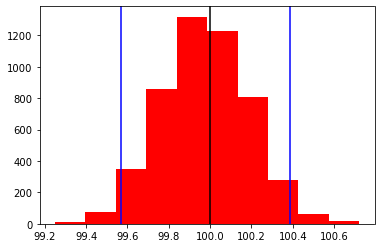

In [33]:
S_N = 20 

index = np.random.permutation(N)[0:S_N]

samp_data = pop_data[index]

num_boots = 10000

boot_mean = np.zeros(num_boots)

for i in np.arange(num_boots):
    
    boot_data = samp_data[np.random.randint(S_N, size=S_N)]
    
    boot_mean[i] = np.mean(boot_data)
    
    
CIs = np.percentile(boot_mean, [2.5, 97.5])

plt.hist(boot_mean, color = 'r')
plt.axvline(pop_mean, color='k')
plt.axvline(CIs[0], color='b')
plt.axvline(CIs[1], color='b')
plt.show()
    
    

In [31]:
print(np.random.randint(S_N, size=S_N))

[ 8  4 12 18  9 18  5 19  2  7 10 14 15 19  5 14  4 16  8 15]


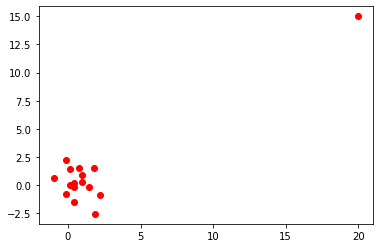

0.9170709404550901
its a Nature paper!!!


In [42]:
# correlations...
np.random.seed(0)

N=16

d1 = np.random.randn(N)
d2 = np.random.randn(N)

d1[-1] = 20
d2[-1] = 15

plt.scatter(d1, d2, color='r')
plt.show()


para_r, para_p = stats.pearsonr(d1, d2)

print(para_r)
print('its a Nature paper!!!')


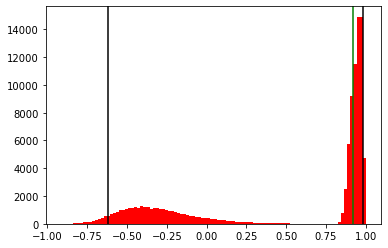

In [44]:
num_boots = 100000

corr = np.zeros(num_boots)

for i in np.arange(num_boots):
    index = np.random.randint(N, size = N)
    
    tmp1 = d1[index]
    tmp2 = d2[index]
    
    corr[i], _ = stats.pearsonr(tmp1, tmp2)
    
CIs = np.percentile(corr, [2.5, 97.5])

plt.hist(corr, color='r', bins = 100)
plt.axvline(para_r, color='g')
plt.axvline(CIs[0], color = 'k')
plt.axvline(CIs[1], color = 'k')
plt.show()